## SkillupAI ML東京20期 通し課題 Day1_work_村井智哉

- データセット名  Kickstarter Projects
- URL https://www.kaggle.com/kemical/kickstarter-projects

## ライブラリの読み込み

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, confusion_matrix
                                                        # 分類問題の性能評価
from sklearn.model_selection import train_test_split    # ホールアウト法
from sklearn.model_selection import KFold               # 交差検証法
from sklearn.preprocessing import MinMaxScaler          # 正規化
from sklearn.preprocessing import StandardScaler        # 標準化

from mpl_toolkits.mplot3d import Axes3D                 # 3D描画
from scipy import genfromtxt                            # 3D描画

## データの読み込み

Kickstarter（キックスターター）とは2009年に設立されたアメリカ合衆国の民間営利企業で、自社のウェブサイトにおいてクリエイティブなプロジェクトに向けてクラウドファンディングによる資金調達を行う手段を提供している。

|項目            |種類|内容                  |
|----------------|----|----------------------|
|ID	             |key |ID　　　　　　　　　　|
|name	         |文字|名前(Kickstarterの?)　|
|category	     |文字|種類　　　　　　　　　|
|main_category	 |文字|主な種類　　　　　　　|
|currency	     |通貨|通貨　　　　　　　　　|
|deadline	     |日付|締切　　　　　　　　　|
|goal	         |数値|目標金額　　　　　　　|
|launched	     |日付|発売日付　　　　　　　|
|pledged	     |数値|約束された金額　　　　|
|state	         |文字|状態　■目的変数　　　|
|backers	     |数値|後援者　　　　　　　　|
|country	     |文字|国名コード　　　　　　|
|usd pledged	 |数値|約束された米ドル　　　|
|usd_pledged_real|数値|実際に約束された米ドル|	
|usd_goal_real   |数値|実際の米ドルの目標　　|


In [2]:
df_ksp = pd.read_csv("./input/ks-projects-201801.csv")

In [3]:
display(df_ksp.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### データ各項目の確認

In [4]:
# データ全体の行数、列数
print("df_ksp.shape=", df_ksp.shape)

df_ksp.shape= (378661, 15)


In [5]:
# 各項目の行数と型
df_ksp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
# 各項目の欠損値
df_ksp.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
# 項目 ID の概要確認 … 欠損値・なし
tmp = df_ksp["ID"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 378661


array([      5971,      18520,      21109, ..., 2147466649, 2147472329,
       2147476221], dtype=int64)

In [8]:
# 項目 name の概要確認 … 欠損値・4
tmp = df_ksp["name"].unique()
print("num of unique=", len(tmp))
tmp

num of unique= 375765


array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

In [9]:
# 項目 category の概要確認 … 欠損値・なし
tmp = df_ksp["category"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 159


array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [10]:
# 項目 main_category の概要確認 … 欠損値・なし
tmp=df_ksp["main_category"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 15


array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
       'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object)

In [11]:
# 項目 currency の概要確認 … 欠損値・なし
tmp = df_ksp["currency"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 14


array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
       'NOK', 'NZD', 'SEK', 'SGD', 'USD'], dtype=object)

In [12]:
# 項目 deadline の概要確認 … 欠損値・なし
tmp = df_ksp["deadline"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 3164


array(['2009-05-03', '2009-05-16', '2009-05-20', ..., '2018-03-01',
       '2018-03-02', '2018-03-03'], dtype=object)

In [13]:
# 項目 goal の概要確認 … 欠損値・なし
tmp = df_ksp["goal"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 8353


array([1.0e-02, 1.5e-01, 5.0e-01, ..., 8.0e+07, 9.9e+07, 1.0e+08])

In [14]:
# 項目 launched の概要確認 … 欠損値・なし
tmp = df_ksp["launched"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 378089


array(['1970-01-01 01:00:00', '2009-04-21 21:02:48',
       '2009-04-23 00:07:53', ..., '2018-01-02 14:17:46',
       '2018-01-02 14:38:17', '2018-01-02 15:02:31'], dtype=object)

In [15]:
# 項目 pledged の概要確認 … 欠損値・なし
tmp = df_ksp["pledged"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 62130


array([0.00000000e+00, 1.00000000e+00, 1.01000000e+00, ...,
       1.27798435e+07, 1.32852264e+07, 2.03389863e+07])

In [16]:
# 項目 state の概要確認 … 欠損値・なし
tmp = df_ksp["state"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 6


array(['canceled', 'failed', 'live', 'successful', 'suspended',
       'undefined'], dtype=object)

### 【質問】backersがNoneTypeとなった理由がわかりません。

In [17]:
# 項目 backers の概要確認 … 欠損値・なし
tmp = df_ksp["backers"].unique().sort()
print("num of unique=", len(tmp))
np.sort(tmp)

TypeError: object of type 'NoneType' has no len()

In [18]:
# 項目 country の概要確認 … 欠損値・なし
tmp = df_ksp["country"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 23


array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
       'IE', 'IT', 'JP', 'LU', 'MX', 'N,0"', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'], dtype=object)

In [19]:
# 項目 usd pledged の概要確認 … 欠損値・なし
tmp = df_ksp["usd pledged"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 95456


array([0.00000000e+00, 4.70000000e-01, 4.80000000e-01, ...,
       1.32852264e+07, 2.03389863e+07,            nan])

In [20]:
# 項目 usd_pledged_real の概要確認 … 欠損値・なし
tmp = df_ksp["usd_pledged_real"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 106065


array([0.00000000e+00, 4.50000000e-01, 4.70000000e-01, ...,
       1.27798435e+07, 1.32852264e+07, 2.03389863e+07])

In [21]:
# 項目 usd_goal_real の概要確認 … 欠損値・なし
tmp = df_ksp["usd_goal_real"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 50339


array([1.00000000e-02, 1.50000000e-01, 4.90000000e-01, ...,
       1.10169772e+08, 1.51395870e+08, 1.66361391e+08])

In [22]:
df_ksp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<IPython.core.display.Javascript object>


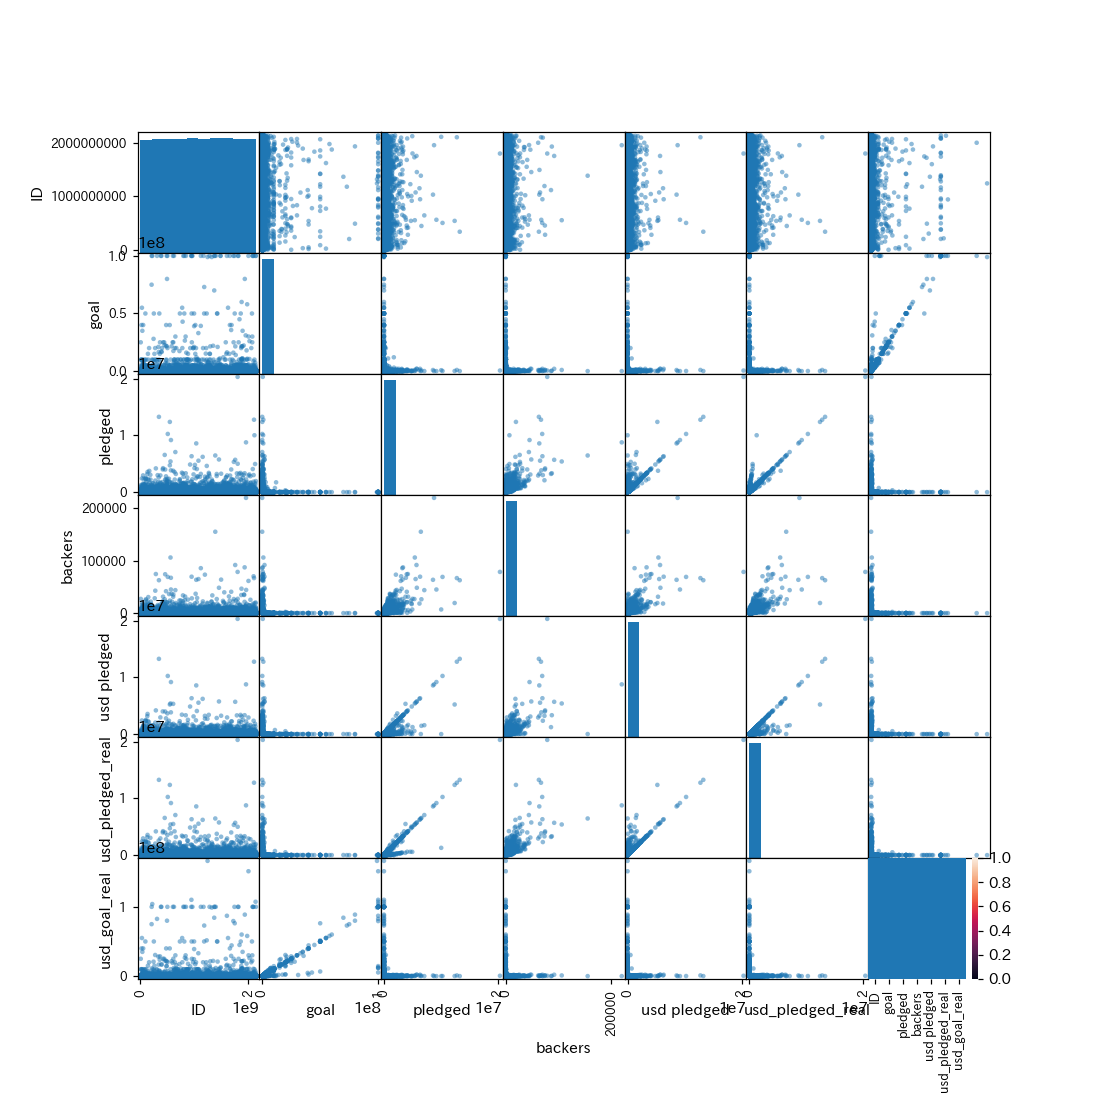

In [23]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_ksp, figsize=(10, 10))
plt.show()

In [24]:
# 相関係数を確認
df_ksp.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


In [25]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ksp.corr())
plt.show()

### 【質問】seabornでの散布図が描けない理由がわかりません、ご教示ください

In [26]:
df_ksp_float = df_ksp[["state", "goal", "pledged", "backers",
                    "usd pledged", "usd_pledged_real", "usd_goal_real"]]
sns.pairplot(df_ksp_float, hue="state")

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_metho

ZeroDivisionError: 0.0 cannot be raised to a negative power

In [27]:
df_ksp_float.head()

,state,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,failed,1000.0,0.0,0,0.0,0.0,1533.95
1,failed,30000.0,2421.0,15,100.0,2421.0,30000.00
2,failed,45000.0,220.0,3,220.0,220.0,45000.00
3,failed,5000.0,1.0,1,1.0,1.0,5000.00
4,canceled,19500.0,1283.0,14,1283.0,1283.0,19500.00


<IPython.core.display.Javascript object>


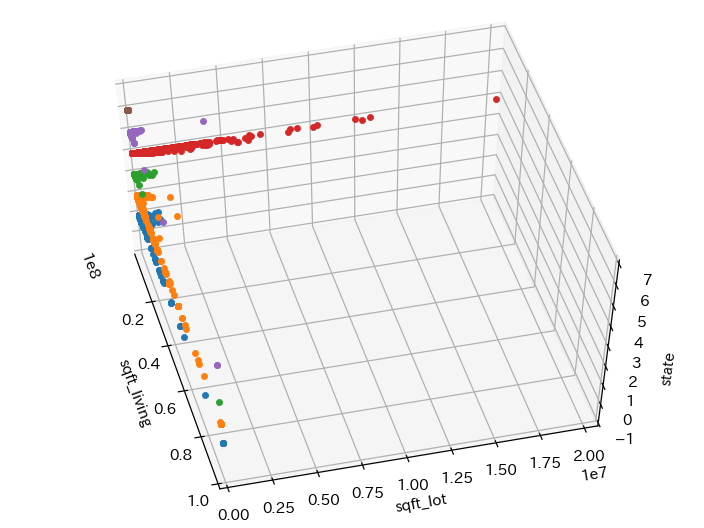

In [28]:
## goal、pledgedとstateの関係

# データ作成
d1 = df_ksp[df_ksp['state']=='canceled'  ][['state', 'goal', 'pledged']]
d2 = df_ksp[df_ksp['state']=='failed'    ][['state', 'goal', 'pledged']]
d3 = df_ksp[df_ksp['state']=='live'      ][['state', 'goal', 'pledged']]
d4 = df_ksp[df_ksp['state']=='successful'][['state', 'goal', 'pledged']]
d5 = df_ksp[df_ksp['state']=='suspended' ][['state', 'goal', 'pledged']]
d6 = df_ksp[df_ksp['state']=='undefined' ][['state', 'goal', 'pledged']]
d1['state'] = 1
d2['state'] = 2
d3['state'] = 3
d4['state'] = 4
d5['state'] = 5
d6['state'] = 6

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("goal")
ax.set_ylabel("pledged")
ax.set_zlabel("state")

# 表示範囲の設定
ax.set_xlim(min(df_ksp['goal'])   ,max(df_ksp['goal']))
ax.set_ylim(min(df_ksp['pledged']),max(df_ksp['pledged']))
ax.set_zlim(-1, 7)

# グラフ描画
ax.plot(d1[:]["goal"], d1[:]["pledged"], d1[:]["state"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["goal"], d2[:]["pledged"], d2[:]["state"], 
        "o", color="C1", ms=4, mew=0.5)
ax.plot(d3[:]["goal"], d3[:]["pledged"], d3[:]["state"], 
        "o", color="C2", ms=4, mew=0.5)
ax.plot(d4[:]["goal"], d4[:]["pledged"], d4[:]["state"], 
        "o", color="C3", ms=4, mew=0.5)
ax.plot(d5[:]["goal"], d5[:]["pledged"], d5[:]["state"], 
        "o", color="C4", ms=4, mew=0.5)
ax.plot(d6[:]["goal"], d6[:]["pledged"], d6[:]["state"], 
        "o", color="C5", ms=4, mew=0.5)
plt.show()

<IPython.core.display.Javascript object>


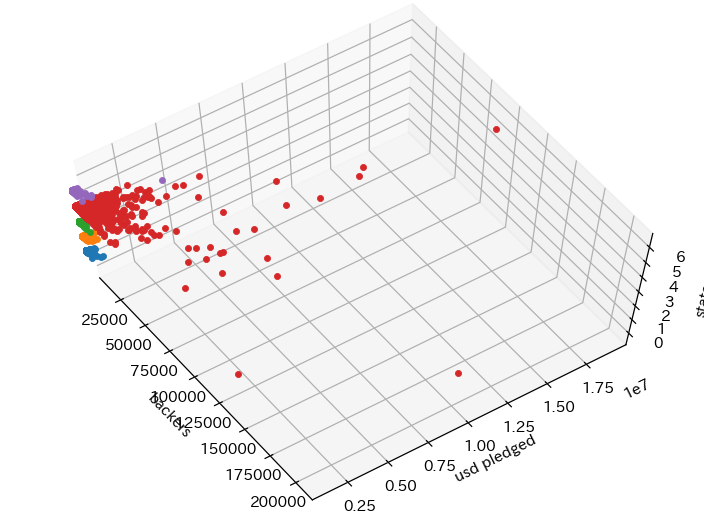

In [31]:
## backers、usd pledgedとstateの関係

# データ作成
d1 = df_ksp[df_ksp['state']=='canceled'  ][['state', 'backers', 'usd pledged']]
d2 = df_ksp[df_ksp['state']=='failed'    ][['state', 'backers', 'usd pledged']]
d3 = df_ksp[df_ksp['state']=='live'      ][['state', 'backers', 'usd pledged']]
d4 = df_ksp[df_ksp['state']=='successful'][['state', 'backers', 'usd pledged']]
d5 = df_ksp[df_ksp['state']=='suspended' ][['state', 'backers', 'usd pledged']]
d6 = df_ksp[df_ksp['state']=='undefined' ][['state', 'backers', 'usd pledged']]
d1['state'] = 1
d2['state'] = 2
d3['state'] = 3
d4['state'] = 4
d5['state'] = 5
d6['state'] = 6

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("backers")
ax.set_ylabel("usd pledged")
ax.set_zlabel("state")

# 表示範囲の設定
ax.set_xlim(min(df_ksp['backers'])   ,max(df_ksp['backers']))
ax.set_ylim(min(df_ksp['usd pledged']),max(df_ksp['usd pledged']))
ax.set_zlim(-1, 7)

# グラフ描画
ax.plot(d1[:]["backers"], d1[:]["usd pledged"], d1[:]["state"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["backers"], d2[:]["usd pledged"], d2[:]["state"], 
        "o", color="C1", ms=4, mew=0.5)
ax.plot(d3[:]["backers"], d3[:]["usd pledged"], d3[:]["state"], 
        "o", color="C2", ms=4, mew=0.5)
ax.plot(d4[:]["backers"], d4[:]["usd pledged"], d4[:]["state"], 
        "o", color="C3", ms=4, mew=0.5)
ax.plot(d5[:]["backers"], d5[:]["usd pledged"], d5[:]["state"], 
        "o", color="C4", ms=4, mew=0.5)
ax.plot(d6[:]["backers"], d6[:]["usd pledged"], d6[:]["state"], 
        "o", color="C5", ms=4, mew=0.5)
plt.show()

<IPython.core.display.Javascript object>


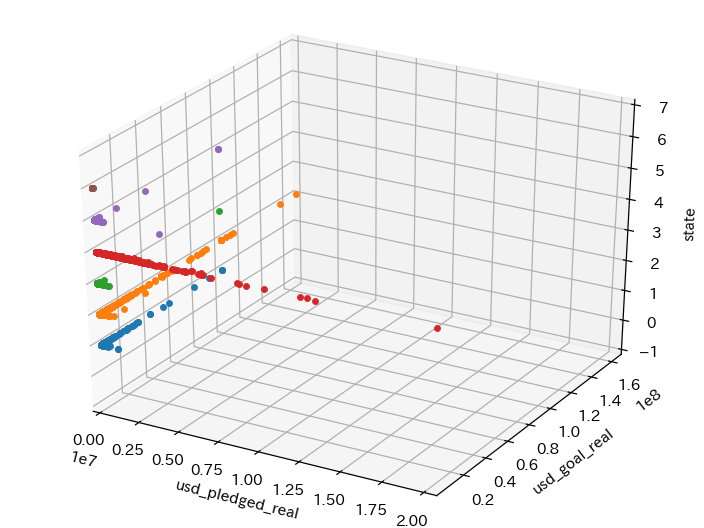

In [32]:
## usd_pledged_real、usd_goal_realとstateの関係

# データ作成
d1 = df_ksp[df_ksp['state']=='canceled'  ][['state', 'usd_pledged_real', 'usd_goal_real']]
d2 = df_ksp[df_ksp['state']=='failed'    ][['state', 'usd_pledged_real', 'usd_goal_real']]
d3 = df_ksp[df_ksp['state']=='live'      ][['state', 'usd_pledged_real', 'usd_goal_real']]
d4 = df_ksp[df_ksp['state']=='successful'][['state', 'usd_pledged_real', 'usd_goal_real']]
d5 = df_ksp[df_ksp['state']=='suspended' ][['state', 'usd_pledged_real', 'usd_goal_real']]
d6 = df_ksp[df_ksp['state']=='undefined' ][['state', 'usd_pledged_real', 'usd_goal_real']]
d1['state'] = 1
d2['state'] = 2
d3['state'] = 3
d4['state'] = 4
d5['state'] = 5
d6['state'] = 6

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("usd_pledged_real")
ax.set_ylabel("usd_goal_real")
ax.set_zlabel("state")

# 表示範囲の設定
ax.set_xlim(min(df_ksp['usd_pledged_real'])   ,max(df_ksp['usd_pledged_real']))
ax.set_ylim(min(df_ksp['usd_goal_real']),max(df_ksp['usd_goal_real']))
ax.set_zlim(-1, 7)

# グラフ描画
ax.plot(d1[:]["usd_pledged_real"], d1[:]["usd_goal_real"], d1[:]["state"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["usd_pledged_real"], d2[:]["usd_goal_real"], d2[:]["state"], 
        "o", color="C1", ms=4, mew=0.5)
ax.plot(d3[:]["usd_pledged_real"], d3[:]["usd_goal_real"], d3[:]["state"], 
        "o", color="C2", ms=4, mew=0.5)
ax.plot(d4[:]["usd_pledged_real"], d4[:]["usd_goal_real"], d4[:]["state"], 
        "o", color="C3", ms=4, mew=0.5)
ax.plot(d5[:]["usd_pledged_real"], d5[:]["usd_goal_real"], d5[:]["state"], 
        "o", color="C4", ms=4, mew=0.5)
ax.plot(d6[:]["usd_pledged_real"], d6[:]["usd_goal_real"], d6[:]["state"], 
        "o", color="C5", ms=4, mew=0.5)
plt.show()